## Running MakeDataset.py

In [9]:
%run MakeDataset.py

['Subject_1.csv', 'Subject_11.csv', 'Subject_14.csv', 'Subject_15.csv', 'Subject_16.csv', 'Subject_17.csv', 'Subject_19.csv', 'Subject_21.csv', 'Subject_22.csv', 'Subject_23.csv', 'Subject_25.csv', 'Subject_26.csv', 'Subject_27.csv', 'Subject_28.csv', 'Subject_29.csv', 'Subject_3.csv', 'Subject_30.csv', 'Subject_5.csv', 'Subject_6.csv', 'Subject_7.csv', 'Subject_8.csv']
['Subject_1.csv', 'Subject_11.csv', 'Subject_14.csv', 'Subject_15.csv', 'Subject_16.csv', 'Subject_17.csv', 'Subject_19.csv', 'Subject_21.csv', 'Subject_22.csv', 'Subject_23.csv', 'Subject_25.csv', 'Subject_26.csv', 'Subject_27.csv', 'Subject_28.csv', 'Subject_29.csv', 'Subject_3.csv', 'Subject_30.csv', 'Subject_5.csv', 'Subject_6.csv', 'Subject_7.csv', 'Subject_8.csv']
['Subject_1.csv', 'Subject_11.csv', 'Subject_14.csv', 'Subject_15.csv', 'Subject_16.csv', 'Subject_17.csv', 'Subject_19.csv', 'Subject_21.csv', 'Subject_22.csv', 'Subject_23.csv', 'Subject_25.csv', 'Subject_26.csv', 'Subject_27.csv', 'Subject_28.csv', 'S

### Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%pip install tsfel


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import tsfel as ts
import numpy as np
import pandas as pd

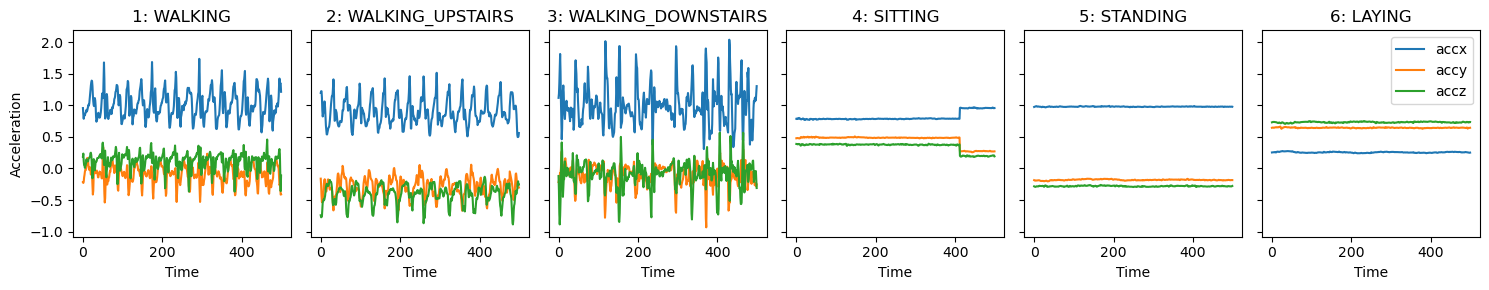

In [12]:
id_to_class = {v: k for k, v in classes.items()}
# makes a new dict with v as key and k as value for every pair (k,v)

unique_classes = np.unique(y_train)

fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 3), sharex=True, sharey=True)
# sharex, sharey to use same scale and ticks for both xaxis and yaxis

for i, cls in enumerate(unique_classes):
    x_id = np.where(y_train == cls)[0][0]
    sample = X_train[x_id]
    axes[i].plot(sample[:,0], label="accx")
    axes[i].plot(sample[:,1], label="accy")
    axes[i].plot(sample[:,2], label="accz")
    axes[i].set_title(f"{cls}: {id_to_class[cls]}")
    axes[i].set_xlabel("Time")

axes[0].set_ylabel("Acceleration")
axes[5].legend()
plt.tight_layout()
plt.show()

The first three activities (dynamic activities): Walking, Walking Upstairs and Walking Downstairs show oscillatory patterns with seemingly periodic changes. Whereas the next three activities (static activities): Sitting, Standing and Laying show relatively flat patterns with minimal changes. 

Among the dynamic activities, we can see difference in amplitude and slopes. Among the static activities, the relative dominance of accx,accy,accz varies (For example, in Laying, accy > accz > accx and in Standing, accx > accz > accy with a slight exception in between). 

Hence, by only observing these plots, one can distinguish between dynamic and static activities; but cannot identify the specific type of dynamic or static activity it is.

### Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $ (acc_x^2 + acc_y^2 + acc_z^2) $ for each activity and justify your answer.

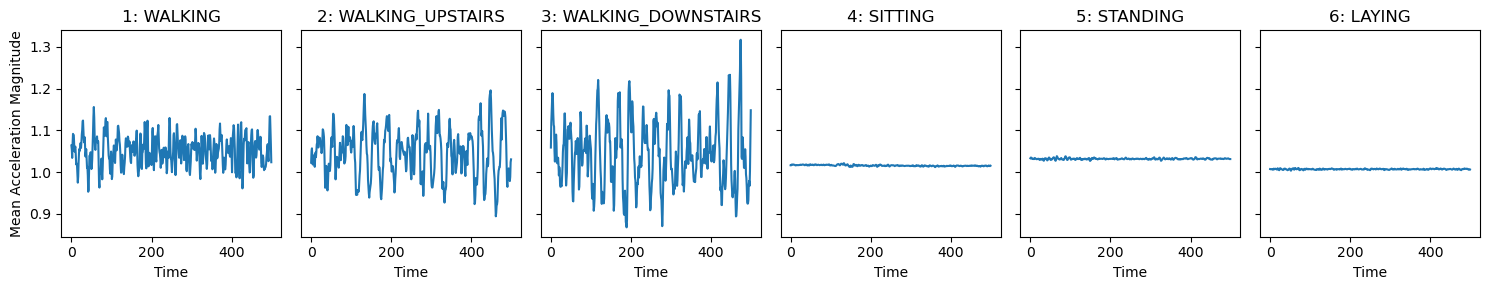

In [13]:
fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 3), sharex=True, sharey=True)

acc_mag_all = np.sqrt(np.sum(X_train**2, axis=2)) # X_train shape: (126,500,3), acc_mag_all shape: (126,500)

for i, cls in enumerate(unique_classes):
    x_ids = np.where(y_train == cls)[0]
    
    mean_acc_mag = np.mean(acc_mag_all[x_ids], axis=0)
    
    axes[i].plot(mean_acc_mag)
    axes[i].set_title(f"{cls}: {id_to_class[cls]}")
    axes[i].set_xlabel("Time")

axes[0].set_ylabel("Mean Acceleration Magnitude")

plt.tight_layout()
plt.show()

In [14]:
acc_mag_all.shape

(126, 500)

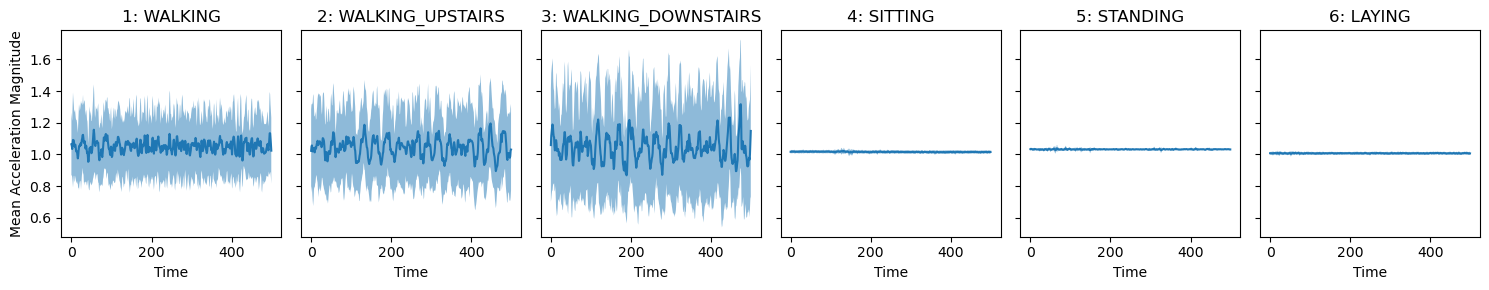

In [15]:
fig, axes = plt.subplots(1, len(unique_classes), figsize=(15, 3), sharex=True, sharey=True)

acc_mag_all = np.sqrt(np.sum(X_train**2, axis=2)) # X_train shape: (126,500,3), acc_mag_all shape: (126,500)

for i, cls in enumerate(unique_classes):
    x_ids = np.where(y_train == cls)[0]
    
    mean_acc_mag = np.mean(acc_mag_all[x_ids], axis=0)
    std_acc_mag  = np.std(acc_mag_all[x_ids], axis=0)
    
    axes[i].plot(mean_acc_mag)
    # using std deviation to visualize the spread across samples
    axes[i].fill_between(range(len(mean_acc_mag)), mean_acc_mag - std_acc_mag, mean_acc_mag + std_acc_mag, alpha=0.5)
    axes[i].set_title(f"{cls}: {id_to_class[cls]}")
    axes[i].set_xlabel("Time")

axes[0].set_ylabel("Mean Acceleration Magnitude")

plt.tight_layout()
plt.show()

We don’t need a ML model to distinguish static activities from dynamic activities, since the acceleration magnitude is nearly constant for static and oscillatory for dynamic.
However, we need a ML model to distinguish between different dynamic activities and between different static activities, because their acceleration magnitude patterns are quite similar. For example, its difficult to identify between sitting and laying as their patterns are almost indistinguishable. 

### Visualize the data using PCA. 

### Use PCA (Principal Component Analysis) on Total Acceleration $ (acc_x^2 + acc_y^2 + acc_z^2) $ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

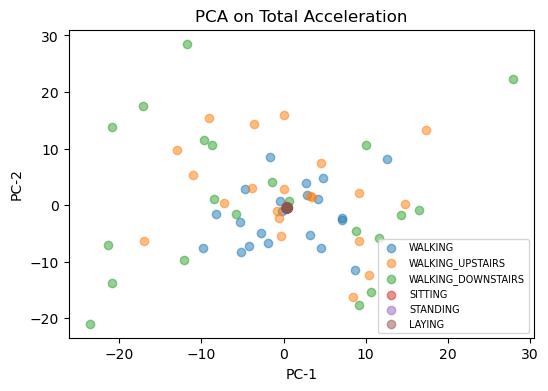

In [16]:
scaler = StandardScaler()
# standardizing mean=0, variance=1 to avoid PCA giving more weight to time steps with large variance. 
scaled_acc_mag_all = scaler.fit_transform(acc_mag_all) 

pca_1 = PCA(n_components=2)
pca_acc = pca_1.fit_transform(scaled_acc_mag_all) # shape: (126,2)
# computes the pc directions from acc_mag_all treating each sample as a 500-dimensional point and projects each sample onto top 2 components.

plt.figure(figsize=(6,4))
for cls in np.unique(y_train):
    plt.scatter(pca_acc[y_train==cls,0], pca_acc[y_train==cls,1], label=id_to_class[cls], alpha=0.5)
plt.title("PCA on Total Acceleration")
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.legend(loc="lower right", fontsize=7)
plt.show()

### Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

['statistical','spectral'], ['statistical','spectral', 'temporal'], ['spectral', 'temporal'] and ['spectral'] are giving the same plot. So, we proceeded with only spectral features to reduce the feature complexity.

In [17]:
y_train

array([2, 6, 5, 2, 2, 2, 1, 1, 5, 4, 1, 4, 1, 1, 6, 2, 3, 1, 1, 4, 3, 3,
       5, 6, 5, 1, 3, 6, 4, 5, 5, 2, 5, 1, 1, 6, 4, 3, 3, 3, 3, 4, 6, 3,
       4, 1, 2, 2, 6, 5, 5, 3, 6, 6, 4, 3, 4, 2, 4, 5, 5, 5, 5, 4, 6, 6,
       4, 5, 3, 4, 3, 1, 4, 4, 3, 1, 5, 2, 3, 6, 1, 4, 2, 2, 5, 2, 1, 3,
       6, 6, 2, 5, 6, 1, 3, 5, 2, 3, 4, 4, 2, 5, 1, 1, 1, 3, 4, 5, 6, 1,
       3, 6, 5, 4, 2, 2, 6, 2, 6, 6, 3, 1, 4, 6, 2, 2])

In [18]:
acc_mag_all.shape

(126, 500)

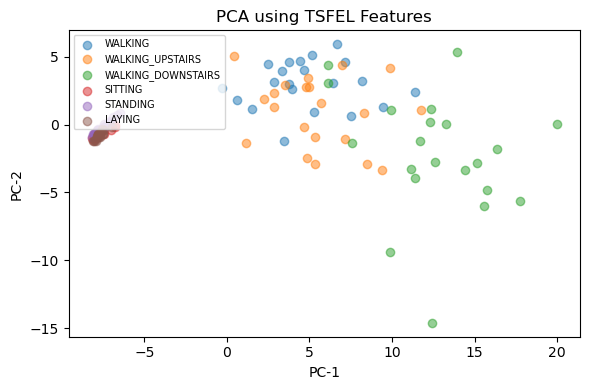

No. of spectral features extracted: 111 

Feature names: ['0_Fundamental frequency', '0_Human range energy', '0_LPCC_0', '0_LPCC_1', '0_LPCC_10', '0_LPCC_11', '0_LPCC_2', '0_LPCC_3', '0_LPCC_4', '0_LPCC_5', '0_LPCC_6', '0_LPCC_7', '0_LPCC_8', '0_LPCC_9', '0_MFCC_0', '0_MFCC_1', '0_MFCC_10', '0_MFCC_11', '0_MFCC_2', '0_MFCC_3', '0_MFCC_4', '0_MFCC_5', '0_MFCC_6', '0_MFCC_7', '0_MFCC_8', '0_MFCC_9', '0_Max power spectrum', '0_Maximum frequency', '0_Median frequency', '0_Power bandwidth', '0_Spectral centroid', '0_Spectral decrease', '0_Spectral distance', '0_Spectral entropy', '0_Spectral kurtosis', '0_Spectral positive turning points', '0_Spectral roll-off', '0_Spectral roll-on', '0_Spectral skewness', '0_Spectral slope', '0_Spectral spread', '0_Spectral variation', '0_Spectrogram mean coefficient_0.0Hz', '0_Spectrogram mean coefficient_0.81Hz', '0_Spectrogram mean coefficient_1.61Hz', '0_Spectrogram mean coefficient_10.48Hz', '0_Spectrogram mean coefficient_11.29Hz', '0_Spectrogram mea

In [19]:
tsfel_config = ts.get_features_by_domain(['spectral']) # selecting only spectral features

# extracting features separately for each sample, store in a list
features = []
for i in range(acc_mag_all.shape[0]): # acc_mag_all shape: (126,500) # acc_mag_all.shape[0] is 126
    
    df_features = ts.time_series_features_extractor(tsfel_config, acc_mag_all[i], fs=50, verbose=0)
    # extracts spectral features for acc_mag_all[i] samples
    # verbose=0 disables messages.
    
    features.append(df_features.values.flatten())
    # converts dataframe of features into 1D array

X_tsfel = np.vstack(features)  # shape: (126, no_of_features)
# vertically stacks all 1D feature arrays into a 2D array
scaler_2 = StandardScaler()
scaled_X_tsfel = scaler_2.fit_transform(X_tsfel)

pca_2 = PCA(n_components=2)
pca_tsfel = pca_2.fit_transform(scaled_X_tsfel)  # shape: (126,2)

plt.figure(figsize=(6,4))
for cls in np.unique(y_train):
    plt.scatter(pca_tsfel[y_train==cls,0], pca_tsfel[y_train==cls,1], label=id_to_class[cls], alpha=0.5)
plt.title("PCA using TSFEL Features")
plt.xlabel("PC-1")
plt.ylabel("PC-2")
#plt.ylim(-5,15)
plt.legend(loc="upper left", fontsize=7)
plt.tight_layout()
plt.show()

print("No. of spectral features extracted:", X_tsfel.shape[1],"\n")
print("Feature names:", df_features.columns.tolist())

### Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\RUPANJAN\AppData\Local\Temp\ipykernel_11028\797089685.py:1: SyntaxWarning: invalid escape sequence '\s'
  X_train_dataset = pd.read_csv(r"D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\UCI HAR Dataset\train\X_train.txt", sep='\s+', header=None)
C:\Users\RUPANJAN\AppData\Local\Temp\ipykernel_11028\797089685.py:2: SyntaxWarning: invalid escape sequence '\s'
  y_train_dataset = pd.read_csv(r"D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\UCI HAR Dataset\train\y_train.txt", sep='\s+', header=None).values.flatten()


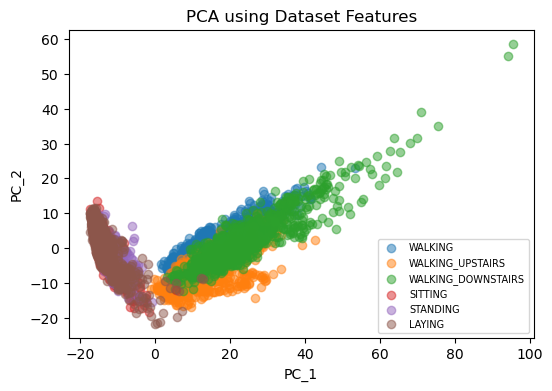

In [20]:
X_train_dataset = pd.read_csv(r"D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\UCI HAR Dataset\train\X_train.txt", sep='\s+', header=None)
y_train_dataset = pd.read_csv(r"D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\UCI HAR Dataset\train\y_train.txt", sep='\s+', header=None).values.flatten()

scaler_3 = StandardScaler()
scaled_X_train_dataset = scaler_3.fit_transform(X_train_dataset)

pca_3 = PCA(n_components=2)
pca_dataset = pca_3.fit_transform(scaled_X_train_dataset)  # shape: 

plt.figure(figsize=(6,4))
for cls in np.unique(y_train_dataset):
    plt.scatter( pca_dataset[y_train_dataset==cls, 0], pca_dataset[y_train_dataset==cls, 1], label=id_to_class[cls], alpha=0.5)
    
plt.title("PCA using Dataset Features")
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend(loc="lower right", fontsize=7)
plt.show()

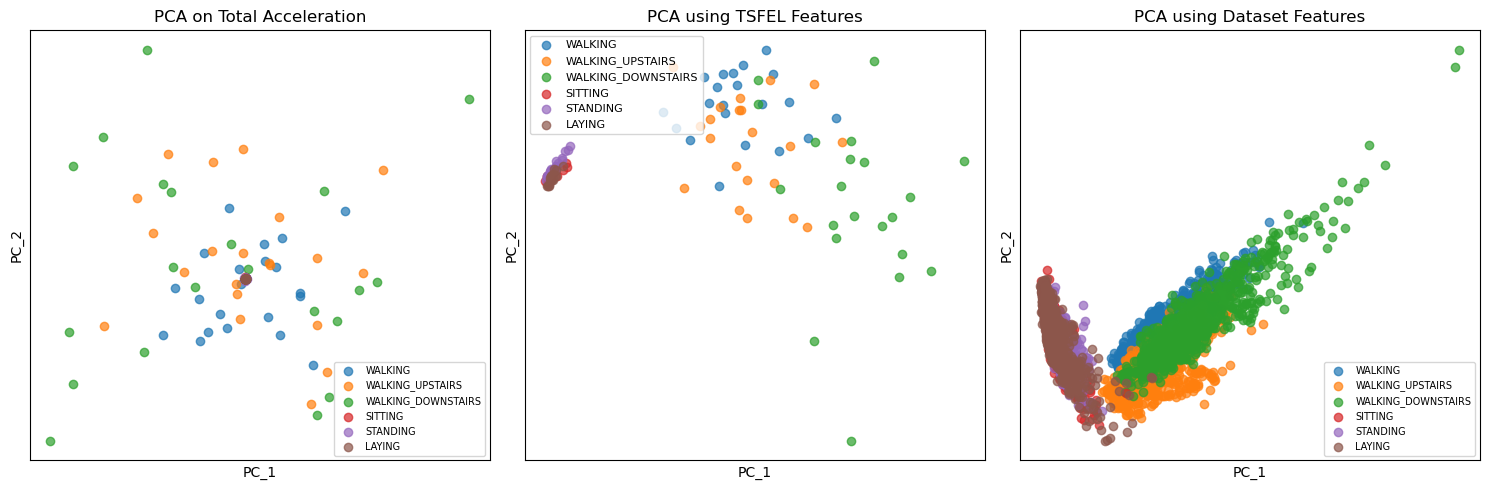

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].set_title("PCA on Total Acceleration")
for cls in np.unique(y_train):
    axes[0].scatter(pca_acc[y_train==cls,0], pca_acc[y_train==cls,1], label=id_to_class[cls], alpha=0.7)
axes[0].set_xlabel("PC_1")
axes[0].set_ylabel("PC_2")
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].legend(loc="lower right", fontsize=7)

axes[1].set_title("PCA using TSFEL Features")
for cls in np.unique(y_train):
    axes[1].scatter(pca_tsfel[y_train==cls,0], pca_tsfel[y_train==cls,1], label=id_to_class[cls], alpha=0.7)
axes[1].set_xlabel("PC_1")
axes[1].set_ylabel("PC_2")
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].legend(loc="upper left", fontsize=8)

axes[2].set_title("PCA using Dataset Features")
for cls in np.unique(y_train_dataset):
    axes[2].scatter(pca_dataset[y_train_dataset==cls,0], pca_dataset[y_train_dataset==cls,1], label=id_to_class[cls], alpha=0.7)
axes[2].set_xlabel("PC_1")
axes[2].set_ylabel("PC_2")
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].legend(loc="lower right", fontsize=7)

plt.tight_layout()
plt.show()

In PCA on Total Acceleration, most of the points are overlapped and clustered together. So, its not good enough. 
In PCA using TSFEL features, each activity forms comparitively different clusters. 

In [ ]:
Task 2 : Decision Trees for Human Activity Recognition

Checking Sklearn Library in TSEFL Features

In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

def acc_check(X_tr, X_ts,y_tr,y_ts):
    accu = []
    dep = []
    for i in range (2,9):
        des_tr = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
        des_tr.fit(X_tr,y_tr)
        y_ts_pr = des_tr.predict(X_ts)
    #    c = confusion_matrix(y_ts,y_ts_pr)
    #    ConfusionMatrixDisplay(c).plot(cmap= 'viridis')
        accu.append(accuracy_score(y_ts,y_ts_pr))
        dep.append(i)
        print("Accuracy with depth", i, ":", accuracy_score(y_ts,y_ts_pr))
        print("Classification Score", i, ":", classification_report(y_ts,y_ts_pr))
    return accu, dep

def plot_fig(dep,accu):
    plt.plot(dep,accu)
    plt.scatter(dep,accu)
    plt.xlabel("Depth of tree")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.ylim(0,1)

In [24]:
acc_mag_all_ts = np.sqrt(np.sum(X_test**2, axis=2))
tsfel_config = ts.get_features_by_domain(['spectral']) # selecting only spectral features

# extracting features separately for each sample, store in a list
features_ts = []
for i in range(acc_mag_all_ts.shape[0]): # acc_mag_all shape: (126,500) # acc_mag_all.shape[0] is 126
    
    df_features_ts = ts.time_series_features_extractor(tsfel_config, acc_mag_all_ts[i], fs=50, verbose=0)
    # extracts spectral features for acc_mag_all[i] samples
    # verbose=0 disables messages.
    
    features_ts.append(df_features_ts.values.flatten())
    # converts dataframe of features into 1D array

X_tsfel_ts = np.vstack(features_ts)  # shape: (126, no_of_features)

Accuracy with depth 2 : 0.5370370370370371
Classification Score 2 :               precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.37      0.78      0.50         9
           3       0.00      0.00      0.00         9
           4       0.50      0.89      0.64         9
           5       0.73      0.89      0.80         9
           6       0.00      0.00      0.00         9

    accuracy                           0.54        54
   macro avg       0.39      0.54      0.44        54
weighted avg       0.39      0.54      0.44        54

Accuracy with depth 3 : 0.6851851851851852
Classification Score 3 :               precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.70      0.78      0.74         9
           3       0.89      0.89      0.89         9
           4       0.50      0.56      0.53         9
           5       0.70      0.78      0.74       

C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

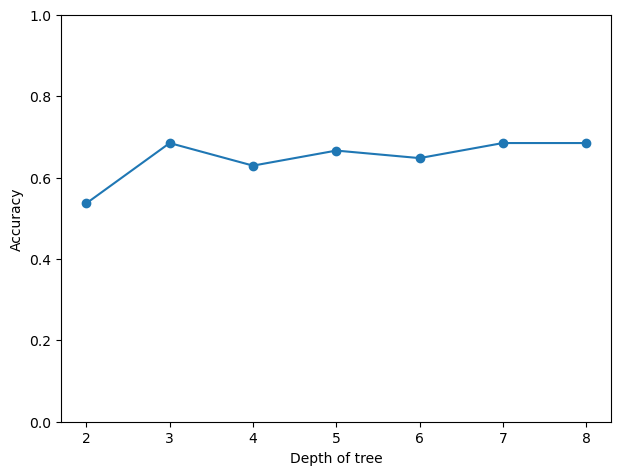

In [25]:
accu , dep = acc_check(X_tsfel, X_tsfel_ts,y_train,y_test)
plot_fig(dep,accu)

On Raw Data

In [26]:
pd.DataFrame(acc_mag_all).to_csv("X_train_stacked.csv", index = False)
pd.DataFrame(y_train).to_csv("y_train_stacked.csv", index = False)
pd.DataFrame(acc_mag_all_ts).to_csv("X_test_stacked.csv", index = False)
pd.DataFrame(y_test).to_csv("y_test_stacked.csv", index = False)

Accuracy with depth 2 : 0.48148148148148145
Classification Score 2 :               precision    recall  f1-score   support

           1       0.30      0.33      0.32         9
           2       0.00      0.00      0.00         9
           3       0.38      0.56      0.45         9
           4       0.43      1.00      0.60         9
           5       0.90      1.00      0.95         9
           6       0.00      0.00      0.00         9

    accuracy                           0.48        54
   macro avg       0.34      0.48      0.39        54
weighted avg       0.34      0.48      0.39        54

Accuracy with depth 3 : 0.5370370370370371
Classification Score 3 :               precision    recall  f1-score   support

           1       1.00      0.11      0.20         9
           2       0.33      0.33      0.33         9
           3       0.38      0.56      0.45         9
           4       0.50      0.44      0.47         9
           5       0.90      1.00      0.95      

C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

Accuracy with depth 6 : 0.6666666666666666
Classification Score 6 :               precision    recall  f1-score   support

           1       0.75      0.67      0.71         9
           2       0.50      0.33      0.40         9
           3       0.55      0.67      0.60         9
           4       0.56      0.56      0.56         9
           5       1.00      1.00      1.00         9
           6       0.64      0.78      0.70         9

    accuracy                           0.67        54
   macro avg       0.66      0.67      0.66        54
weighted avg       0.66      0.67      0.66        54

Accuracy with depth 7 : 0.6666666666666666
Classification Score 7 :               precision    recall  f1-score   support

           1       1.00      0.67      0.80         9
           2       0.45      0.56      0.50         9
           3       0.75      0.67      0.71         9
           4       0.50      0.56      0.53         9
           5       1.00      0.89      0.94       

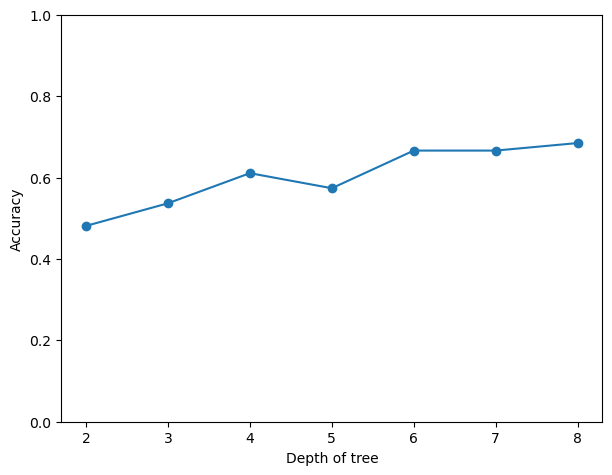

In [27]:
accu , dep = acc_check(acc_mag_all, acc_mag_all_ts,y_train,y_test)
plot_fig(dep,accu)

In all the models it appears that tasks 4 and 6 have low combinations of precision and recall. The reasosn could be the static nature of these activities and it is very easy to confuse some other portion of another activity to get confused as sitting or laying down. Due to exact distinction between walking, upstairs and downstairs they get classified easily, but the latent and confusing nature of activities 4,6 make their metrics worse. Hence, those model performances are bad. 

In [ ]:
Task 3 : Data Collection in the Wild 

Train Manual Data on UCI-HAR trained tree

In [43]:
x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Walking_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_1 = []
for i in range (len(a_1)//2-250,len(a_1)//2+250):
    a_1.append(x["TgF"].iloc[i])
a_1


x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Walking_Upstairs_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_2 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_2.append(x["TgF"].iloc[i])
a_2

x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Walking_Downstairs_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_3 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_3.append(x["TgF"].iloc[i])
a_3

x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Sitting_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_4 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_4.append(x["TgF"].iloc[i])
a_4

x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Standing_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_5 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_5.append(x["TgF"].iloc[i])
a_5

x = pd.read_csv(r"C:\Users\RUPANJAN\Downloads\Laying_Assign1.csv", header = 1)
#a_1 = a_1.to_numpy()
x["TgF"][2500]
a_6 = []
for i in range (len(x["TgF"])//2-250,len(x["TgF"])//2+250):
    a_6.append(x["TgF"].iloc[i])
a_6

df1 = pd.DataFrame([a_1,a_2,a_3,a_4,a_5,a_6])
df1 = df1**2
df1[500] = np.array([1,2,3,4,5,6],dtype = object)
df1 

b_1 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_walking_proc_notime.csv", header = 0)
b_1["t"] = b_1["x"]**2 + b_1["y"]**2 + b_1["z"]**2
b_1 = b_1["z"]
b_1

b_2 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_walking upstairs_proc_notime.csv", header = 0)
b_2["t"] = b_2["x"]**2 + b_2["y"]**2 + b_2["z"]**2
b_2 = b_2["z"]
b_2

b_3 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_walking downstairs_proc_notime.csv", header = 0)
b_3["t"] = b_3["x"]**2 + b_3["y"]**2 + b_3["z"]**2
b_3 = b_3["z"]
b_3

b_4 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_sitting_proc_notime.csv", header = 0)
b_4["t"] = b_4["x"]**2 + b_4["y"]**2 + b_4["z"]**2
b_4 = b_4["z"]
b_4

b_5 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_standing_proc_notime.csv", header = 0)
b_5["t"] = b_5["x"]**2 + b_5["y"]**2 + b_5["z"]**2
b_5 = b_5["z"]
b_5

b_6 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person1_laying_proc_notime.csv", header = 0)
b_6["t"] = b_6["x"]**2 + b_6["y"]**2 + b_6["z"]**2
b_6 = b_6["z"]
b_6

df2 = pd.DataFrame([b_1,b_2,b_3,b_4,b_5,b_6])
df2[500] = np.array([1,2,3,4,5,6],dtype = object)
df2 

c_1 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_walking_proc_notime.csv", header = 0)
c_1["t"] = c_1["x"]**2 + c_1["y"]**2 + c_1["z"]**2
c_1 = c_1["z"]
c_1

c_2 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_walking upstairs_proc_notime.csv", header = 0)
c_2["t"] = c_2["x"]**2 + c_2["y"]**2 + c_2["z"]**2
c_2 = c_2["z"]
c_2

c_3 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_walking downstairs_proc_notime.csv", header = 0)
c_3 = c_3["x"]**2 + c_3["y"]**2 + c_3["z"]**2
c_3

c_4 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_sitting_proc_notime.csv", header = 0)
c_4["t"] = c_4["x"]**2 + c_4["y"]**2 + c_4["z"]**2
c_4 = c_4["z"]
c_4

c_5 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_standing_proc_notime.csv", header = 0)
c_5["t"] = c_5["x"]**2 + c_5["y"]**2 + c_5["z"]**2
c_5 = c_5["z"]
c_5

c_6 = pd.read_csv("D:\IIT GANDHINAGAR\Semester 5\ES335 Machine Learning\Assignment 1\processed_csvs_final\person2_laying_proc_notime.csv", header = 0)
c_6["t"] = c_6["x"]**2 + c_6["y"]**2 + c_6["z"]**2
c_6 = c_6["z"]
c_6

df3 = pd.DataFrame([c_1,c_2,c_3,c_4,c_5,c_6])
df3[500] = np.array([1,2,3,4,5,6])
df3 

df = pd.concat([df1,df2,df3],axis = 0,ignore_index = True)
df

<>:55: SyntaxWarning: invalid escape sequence '\I'
<>:60: SyntaxWarning: invalid escape sequence '\I'
<>:65: SyntaxWarning: invalid escape sequence '\I'
<>:70: SyntaxWarning: invalid escape sequence '\I'
<>:75: SyntaxWarning: invalid escape sequence '\I'
<>:80: SyntaxWarning: invalid escape sequence '\I'
<>:89: SyntaxWarning: invalid escape sequence '\I'
<>:94: SyntaxWarning: invalid escape sequence '\I'
<>:99: SyntaxWarning: invalid escape sequence '\I'
<>:103: SyntaxWarning: invalid escape sequence '\I'
<>:108: SyntaxWarning: invalid escape sequence '\I'
<>:113: SyntaxWarning: invalid escape sequence '\I'
<>:55: SyntaxWarning: invalid escape sequence '\I'
<>:60: SyntaxWarning: invalid escape sequence '\I'
<>:65: SyntaxWarning: invalid escape sequence '\I'
<>:70: SyntaxWarning: invalid escape sequence '\I'
<>:75: SyntaxWarning: invalid escape sequence '\I'
<>:80: SyntaxWarning: invalid escape sequence '\I'
<>:89: SyntaxWarning: invalid escape sequence '\I'
<>:94: SyntaxWarning: invali

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,0.697225,0.705600,7.259040e-01,0.725904,0.741321,0.748225,0.755161,0.774400,0.839056,0.808201,...,6.922240e-01,0.669124,0.644809,0.611524,0.606841,0.697225,0.720801,0.741321,0.826281,1
1,0.923521,0.931225,9.370240e-01,0.942841,0.944784,0.956484,0.958441,0.968256,0.988036,1.012036,...,7.885440e-01,0.793881,0.806404,0.829921,0.846400,0.857476,0.864900,0.872356,0.883600,2
2,0.714025,0.727609,7.708840e-01,0.797449,0.829921,0.908209,0.948676,0.990025,1.056784,1.094116,...,6.707610e-01,0.682276,0.708964,0.720801,0.753424,0.769129,0.788544,0.826281,0.842724,3
3,0.992016,1.000000,1.004004e+00,1.008016,1.010025,1.012036,1.014049,1.012036,1.018081,1.018081,...,9.920160e-01,0.996004,1.000000,1.000000,0.998001,0.998001,0.996004,0.992016,0.986049,4
4,1.129969,1.138489,1.125721e+00,1.115136,1.073296,1.058841,1.028196,1.014049,0.980100,0.952576,...,9.960040e-01,1.010025,1.016064,1.034289,1.040400,1.050625,1.050625,1.046529,1.032256,5
5,0.978121,0.980100,9.840640e-01,0.984064,0.984064,0.982081,0.986049,0.986049,0.986049,0.990025,...,9.721960e-01,0.972196,0.974169,0.972196,0.970225,0.970225,0.974169,0.976144,0.978121,6
6,1.050000,1.235000,9.950000e-01,0.659000,1.368000,1.781000,1.184000,-0.075000,-0.753000,-0.490000,...,-5.700000e-01,-0.220000,0.304000,0.400000,0.285556,-0.032222,-0.511111,-0.886000,-0.988000,1
7,-1.110000,-1.090000,-1.070000e+00,-0.875000,-0.485000,-0.076000,0.218000,0.545000,0.779000,0.693000,...,2.758000e+00,2.924000,2.076000,0.724000,-0.250000,-0.612000,-0.196000,0.300000,0.298000,2
8,-0.700000,-0.890000,-9.640000e-01,-0.797000,-0.507000,-0.179000,0.273000,-0.072000,0.394000,2.195000,...,-1.898000e+00,-1.816000,-1.752000,-1.362000,-0.566000,0.148000,0.502000,1.104000,2.377778,3
9,-0.140000,-0.033000,4.800000e-02,-0.041000,-0.088000,-0.248000,-0.331000,-0.140000,-0.025000,-0.120000,...,7.600000e-02,-0.016000,-0.110000,-0.168000,-0.184000,-0.128000,-0.022000,0.010000,0.001111,4


In [45]:
df.columns
X = df.iloc[:,0:500]
X
y = df.iloc[:,500]
y = y.to_numpy()
y = y.astype(int)
y

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6])

In [47]:
des_tr = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
des_tr.fit(acc_mag_all,y_train)
y_ts_3pr = des_tr.predict(X)
print(classification_report(y,y_ts_3pr))
#print(y_ts_3pr.size, y.size)

              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       1.00      0.33      0.50         3
           3       0.15      0.67      0.25         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3

    accuracy                           0.22        18
   macro avg       0.25      0.22      0.18        18
weighted avg       0.25      0.22      0.18        18



C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

Train Descision Tree on Manual Data and Test it on Split test data

In [66]:
from sklearn.model_selection import train_test_split
X_tr_man,X_ts_man,y_tr_man,y_ts_man = train_test_split(X, y,test_size = 0.1,random_state = 42)
des_tr_man = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
des_tr_man.fit(X_tr_man,y_tr_man)
y_ts_man_pr = des_tr_man.predict(X_ts_man)
print(classification_report(y_ts_man,y_ts_man_pr))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [67]:
tsfel_config_man = ts.get_features_by_domain(['spectral']) # selecting only spectral features

# extracting features separately for each sample, store in a list
features_tr_man = []
for i in range(X_tr_man.shape[0]): # acc_mag_all shape: (126,500) # acc_mag_all.shape[0] is 126
    
    df_features_tr = ts.time_series_features_extractor(tsfel_config, X_tr_man.iloc[i], fs=50, verbose=0)
    # extracts spectral features for acc_mag_all[i] samples
    # verbose=0 disables messages.
    
    features_tr_man.append(df_features_tr.values.flatten())
    # converts dataframe of features into 1D array

X_tsfel_tr_man = np.vstack(features_tr_man)  # shape: (126, no_of_features)


features_ts_man = []
for i in range(X_ts_man.shape[0]): # acc_mag_all shape: (126,500) # acc_mag_all.shape[0] is 126
    
    df_features_ts = ts.time_series_features_extractor(tsfel_config, X_ts_man.iloc[i], fs=50, verbose=0)
    # extracts spectral features for acc_mag_all[i] samples
    # verbose=0 disables messages.
    
    features_ts_man.append(df_features_ts.values.flatten())
    # converts dataframe of features into 1D array

X_tsfel_ts_man = np.vstack(features_ts_man)  # shape: (126, no_of_features)


des_tr_man_rev = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
des_tr_man_rev.fit(X_tsfel_tr_man,y_tr_man)
y_ts_man_rev_pr = des_tr_man_rev.predict(X_tsfel_ts_man)
print(classification_report(y_ts_man,y_ts_man_rev_pr))
#y_ts_man

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RUPANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri